# Proyecto Sprint 6

## Descripción del proyecto

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Inicialización.

### Importación de librerias.

Importación de librerias pandas, math, matplot, numpy, seaborn y scipy para poder acceder y procesar los datos para obtener los estadisticos, así como poder graficar la información.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sta 
from scipy import stats as st
from scipy.stats import iqr
from math import factorial
from matplotlib import pyplot as plt

print (pd)


<module 'pandas' from '/opt/conda/lib/python3.9/site-packages/pandas/__init__.py'>


### Importación de datos

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

## Preparación de datos

### Información general de la base de datos.

Se muestra la información general del DF 'df_games' para conocer qué tipo de datos son, si es necesario realizar algún cambio, se verifica la existencia de valores duplicados y/o ausentes, se realizan cambios iniciales como renombrado de columnas o de valores ausentes, se obtiene información estadística descriptiva general, se muestra un bloque aleatorio de 20 filas.

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df_games.describe(include = 'all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [5]:
df_games.sample(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13661,Scaler,XB,2004.0,Platform,0.03,0.01,0.00,0.00,69.0,tbd,E
7071,Transformers: Devastation,PS4,2015.0,Action,0.10,0.09,0.00,0.04,77.0,7.5,T
16187,Rewrite,PSV,2014.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
12214,Nobunaga no Yabou: Tendou with Power-Up Kit,PS3,2011.0,Strategy,0.00,0.00,0.07,0.00,NaN,NaN,NaN
15813,Aedis Eclipse: Generation of Chaos,PSP,2006.0,Role-Playing,0.02,0.00,0.00,0.00,62.0,6.5,E10+
4357,Walt Disney World Quest: Magical Racing Tour,PS,2000.0,Racing,0.25,0.17,0.00,0.03,NaN,NaN,NaN
15535,Runaway: A Twist of Fate,DS,NaN,Adventure,0.00,0.02,0.00,0.00,66.0,NaN,T
10571,Monster Rancher EVO,PS2,2005.0,Role-Playing,0.02,0.02,0.05,0.01,58.0,6.8,E10+
9125,Akiba's Trip,PSP,2011.0,Adventure,0.00,0.00,0.14,0.00,NaN,NaN,NaN
10305,Astro Boy: The Video Game,Wii,2009.0,Action,0.10,0.00,0.00,0.01,48.0,3.5,E10+


#### Revisión inicial

A partir de la revisión podemos observar que:
  1. Se tienen 16715  y 11 columnas.
  2. 6 de las columnas tienen datos nulos.
  3. 5 columnas son de tipo object y las 6 restantes de tipo float.
  4. Los nombres de las columnas se encuentran en mayúsculas.
    

#### Determinaciones iniciales


1. Los nombres de las columnas serán transformados a un formato snake_case y pasado a minúsculas.

2. Se convertirán los datos en los tipos necesarios según sus registros.

3.  Se revisarán los casos de los registros nulos y datos duplicados. Se determinará dependiendo del tipo de información que maneje la columna, la decisión de rellenar los registros nulos con un dato específico (sea una palabra/letra que describa al registro, tener en cuenta medidas de estadística descriptiva: media, mediana y/o moda).

4. La columna Year_of_Release será cambiado a formato float64 y los datos nulos se cambiarn por 0. Podría usarse el año que en algunos casos aparece, sin embargo este dato puede no corresponder al año real de lanzamiento, por lo que considedo, dada la proporción, es una mejor opción dejarlos como 0.

5. Se estandarizarán las columnas Critic_Score y User_Score para que manejen una igual escala de valoración y facilite el manejo de los datos.

### Renombrado de columnas a minúsculas.

In [6]:
#Se corregirán los nombres de las columnas a través de un bucle. Así se corregirán los datos independiente del 
#número de columnas almacenadas en el DataFrame:

new_col_names = []
for old_name in df_games.columns:
  name_lowered = old_name.lower()
  new_col_names.append(name_lowered)

df_games.columns = new_col_names

display (df_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Cambios de tipo de datos.

#### Describe las columnas en las que los tipos de datos han sido cambiados y explica por qué.

La columna Year_of_Release será cambiado a formato float64 y los datos nulos se cambiarn por 0. Podría usarse el año que en algunos casos aparece, sin embargo este dato puede no corresponder al año real de lanzamiento, por lo que considedo, dada la proporción, es una mejor opción dejarlos como 0.

Se estandarizarán las columnas Critic_Score y User_Score para que manejen una igual escala de valoración y facilite el manejo de los datos. 

Los casos "tbd" se convierten a "nan" con el objeto de unificar el formato de las calificaciones.
 

In [7]:
# Convertir year_of_release y user_score al Dtype correspondiente.

df_games['year_of_release'] = df_games['year_of_release'].fillna(0).astype('int')
df_games.loc[df_games['user_score']=='tbd', 'user_score'] = np.nan
df_games['user_score']=df_games['user_score'].astype('float')

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df_games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [9]:
# Busqueda de duplicados 

df_games.duplicated().sum()

0

#### Cálculo de ventas totales para cada juego.

In [10]:
# Se crea una collumna nueva donde se calculan las ventas totales de cada videojuego.

df_games['total_sales']=df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## Análisis de datos

### Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [12]:
# Agrupación por año de lanzamiento para determinar el número de videojuegos lanzados.

games_rel=df_games[['year_of_release', 'name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
games_rel=games_rel[games_rel['year_of_release']!=0]
games_rel

,year_of_release,name
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15
10,1989,17


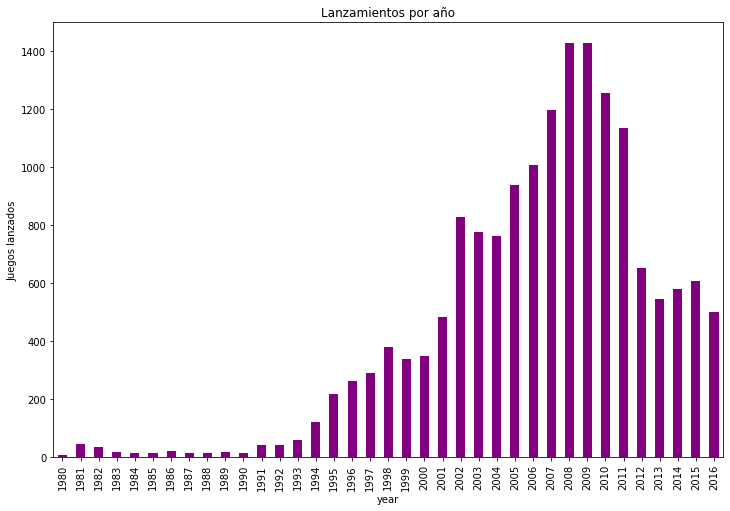

In [13]:
#Creación del histograma que muestre el comportamiento de lanzamientos de videojuegos a lo largo del tiempo.

games_rel.plot(
        title='Lanzamientos por año',
        kind='bar', 
        x='year_of_release',
        xlabel='year',
        xlim=0,
        y='name',
        ylabel='Juegos lanzados',
        ylim= 0, 
        color='purple',
        grid=False,
        figsize=[12, 8],
        legend=False
)
plt.show()

Se observa que el número de lanzamientos de videojuegos comienza a aumentar en la decada de los 90´s y tiene su mejor momento durante los años de 2007 a 2011, teniendo su máximo durante 2008 con 1427 lanzamientos.

### Variación de ventas por plataforma.

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,30.77
9,SAT,33.59


<AxesSubplot:xlabel='platform'>

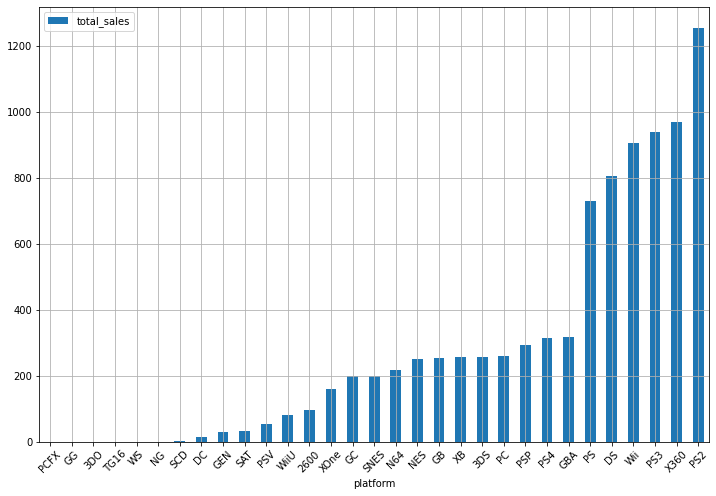

In [14]:
# Agrupación de las ventas totales por plataforma
games_sales=df_games[['platform', 'total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()

display(games_sales)

# Creación del grafico que muestra el comportamiento de las ventas.

games_sales.plot(
    x='platform',
    y='total_sales',
    kind='bar',
    grid=True,
    rot=45, 
    figsize=[12, 8],
)


Se obtionen los descriptivos de las variaciones y se determina usar 'z-value' para tener una mejor apreciación de estas variaciones, se realiza el gráfico correspondiente.

In [15]:
games_sales.describe()

,total_sales
count,31.000000
mean,287.603548
std,348.160256
min,0.030000
25%,23.360000
50%,200.040000
75%,304.095000
max,1255.770000


In [16]:
games_sales['st_dev']=(games_sales['total_sales']-games_sales['total_sales'].mean())/games_sales['total_sales'].std()
games_sales['res']=['black' if x<0 else 'blue' for x in games_sales['st_dev']]
games_sales

,platform,total_sales,st_dev,res
0,PCFX,0.03,-0.825980,black
1,GG,0.04,-0.825952,black
2,3DO,0.10,-0.825779,black
3,TG16,0.16,-0.825607,black
4,WS,1.42,-0.821988,black
5,NG,1.44,-0.821931,black
6,SCD,1.86,-0.820724,black
7,DC,15.95,-0.780254,black
8,GEN,30.77,-0.737688,black
9,SAT,33.59,-0.729588,black


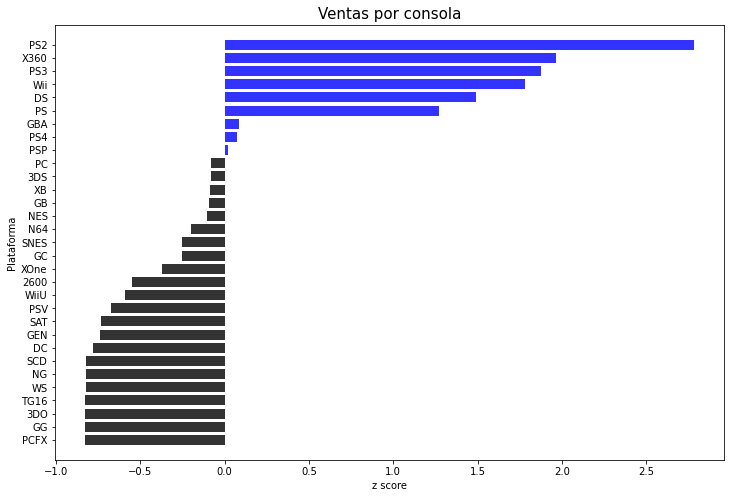

In [17]:
plt.figure(figsize=(12, 8))
plt.hlines(y=games_sales.platform, xmax=games_sales.st_dev, xmin=0, color=games_sales.res, linewidth=10, alpha=0.8)
plt.ylabel('Plataforma')
plt.xlabel('z score')
plt.title('Ventas por consola', size=15);

Se observa que 9 consolas dominan las ventas de videojuegos, siendo PS2  la que domina el mercado con 1255.77 millones de dolares en ventas.

In [18]:
# Se crea un pivot table para conocer el periodo de vida de las consolas.
platform_life = pd.pivot_table(
    df_games,
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).fillna(0)
platform_life=platform_life.iloc[1: , :]
platform_life

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


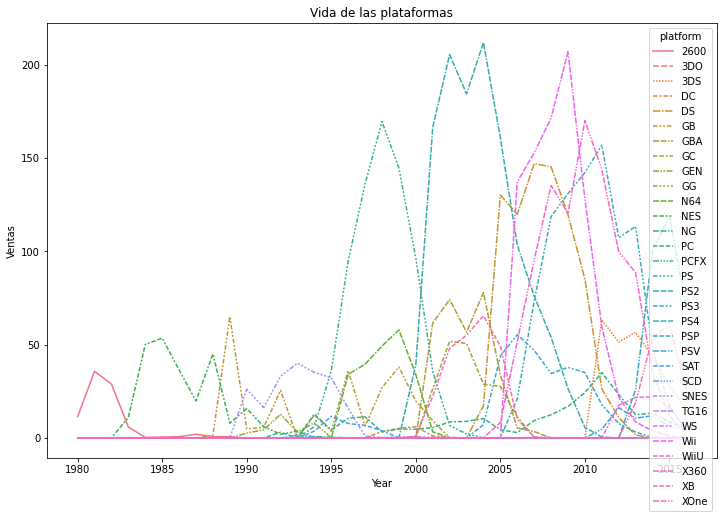

In [19]:
# Gráfico de permanencia de las consolas.
plt.figure(figsize=(12, 8))
sns.lineplot(data=platform_life)
plt.ylabel('Ventas')
plt.xlabel('Year')
plt.title('Vida de las plataformas', size=12);

### Selección de datos relevantes.

Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

Se considera el período posterior al año 2013, ya que es donde se observa cierta tendencia en los consumos.

In [20]:
# Se segmenta el DF para el periodo posterior al año 2013.
relev_dat=df_games[df_games['year_of_release'] >= 2013]

In [21]:
#creación de lista con los valores únicos de las plataformas.
relev_dat_list = relev_dat ['platform'].unique()

print(f'Las principales plataformas son: {relev_dat_list}')

Las principales plataformas son: ['PS3' 'X360' 'PS4' '3DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'DS' 'PSP']


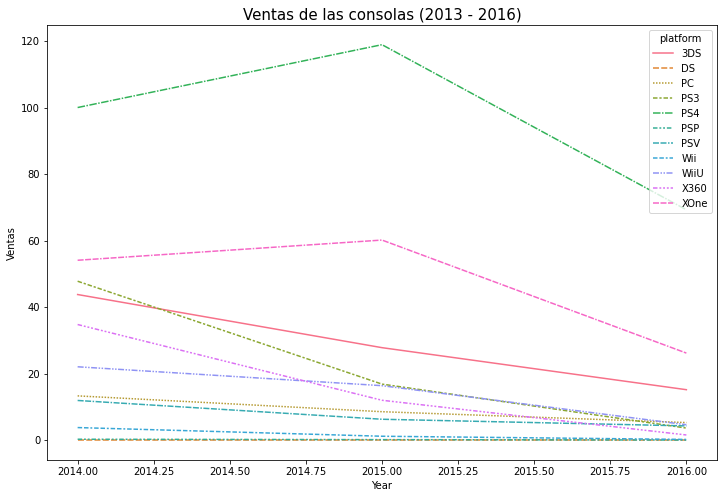

In [22]:
# Creación del dataframe segmentado
new_platform_life = pd.pivot_table(
    relev_dat,
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
).fillna(0)
new_platform_life=new_platform_life.iloc[1: , :]

# Gráfico que muestra el comportamiento de las ventas de plataformas.
plt.figure(figsize=(12, 8))
sns.lineplot(data=new_platform_life)
plt.ylabel('Ventas')
plt.xlabel('Year')
plt.title('Ventas de las consolas (2013 - 2016)', size=15);

### Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma.

¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? 

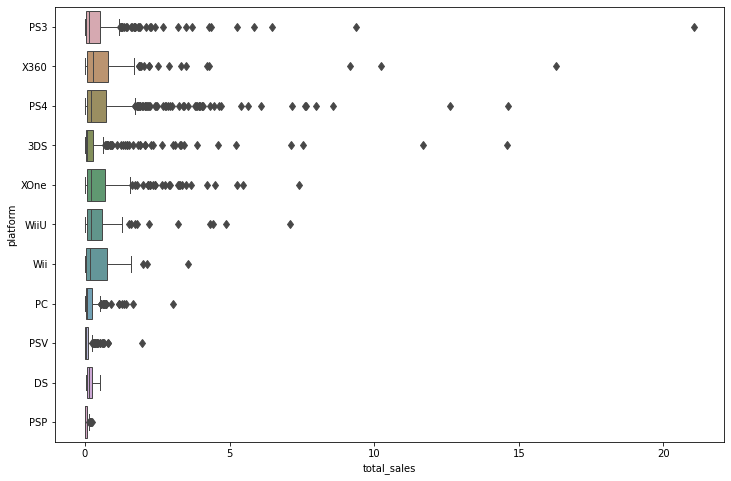

In [23]:
# Se usa la libreria seaborn

plt.figure(figsize=(12, 8))
sns.boxplot(x = "total_sales", y = "platform", data = relev_dat, saturation = 0.4, linewidth = 1,
           fliersize = 6)

plt.show()


In [24]:

for console in relev_dat_list:
    a = relev_dat[relev_dat['platform'] == console]
    description_per_console = a['total_sales'].describe()
    print(f"Plataforma: ", console)
    display(description_per_console)
    

Plataforma:  PS3


count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64

Plataforma:  X360


count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64

Plataforma:  PS4


count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

Plataforma:  3DS


count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

Plataforma:  XOne


count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

Plataforma:  WiiU


count    115.000000
mean       0.562000
std        1.038778
min        0.010000
25%        0.060000
50%        0.200000
75%        0.595000
max        7.090000
Name: total_sales, dtype: float64

Plataforma:  Wii


count    23.000000
mean      0.593913
std       0.915432
min       0.010000
25%       0.045000
50%       0.180000
75%       0.755000
max       3.580000
Name: total_sales, dtype: float64

Plataforma:  PC


count    189.000000
mean       0.208624
std        0.352304
min        0.010000
25%        0.030000
50%        0.080000
75%        0.230000
max        3.050000
Name: total_sales, dtype: float64

Plataforma:  PSV


count    358.000000
mean       0.092151
std        0.153816
min        0.010000
25%        0.020000
50%        0.040000
75%        0.110000
max        1.960000
Name: total_sales, dtype: float64

Plataforma:  DS


count    8.000000
mean     0.192500
std      0.172026
min      0.030000
25%      0.067500
50%      0.150000
75%      0.252500
max      0.510000
Name: total_sales, dtype: float64

Plataforma:  PSP


count    67.000000
mean      0.052239
std       0.059768
min       0.010000
25%       0.015000
50%       0.020000
75%       0.070000
max       0.240000
Name: total_sales, dtype: float64

In [25]:
max_IQR = 0.795 - 0.08
Max_dist_IQR = 0.77 + (1.5 * max_IQR)
print(f'La distacnia máxima intercuartil es: {Max_dist_IQR}')

La distacnia máxima intercuartil es: 1.8425000000000002


In [26]:
games_up_Max_dist_IQR = relev_dat.groupby(['platform','name'])['total_sales'].sum().sort_values(ascending=False).reset_index()
games_up_Max_dist_IQR = games_up_Max_dist_IQR[games_up_Max_dist_IQR['total_sales']> Max_dist_IQR]

display(games_up_Max_dist_IQR)
display(games_up_Max_dist_IQR['name'].unique())
display(games_up_Max_dist_IQR['name'].count())

,platform,name,total_sales
0,PS3,Grand Theft Auto V,21.05
1,X360,Grand Theft Auto V,16.27
2,PS4,Call of Duty: Black Ops 3,14.63
3,3DS,Pokemon X/Pokemon Y,14.60
4,PS4,Grand Theft Auto V,12.62
...,...,...,...
131,PS4,NBA 2K17,1.88
132,X360,Tomb Raider (2013),1.88
133,X360,Batman: Arkham Origins,1.88
134,PS3,Madden NFL 25,1.87


array(['Grand Theft Auto V', 'Call of Duty: Black Ops 3',
       'Pokemon X/Pokemon Y', 'Pokemon Omega Ruby/Pokemon Alpha Sapphire',
       'Call of Duty: Ghosts', 'Minecraft', 'FIFA 16',
       'Star Wars Battlefront (2015)', 'Call of Duty: Advanced Warfare',
       'FIFA 17', 'Super Smash Bros. for Wii U and 3DS', 'Fallout 4',
       'Pokemon Sun/Moon', 'Mario Kart 8', 'FIFA 14', 'FIFA 15',
       'The Last of Us', 'Destiny', "Uncharted 4: A Thief's End",
       'Tomodachi Life', 'Uncharted: The Nathan Drake Collection',
       "Luigi's Mansion: Dark Moon", 'Halo 5: Guardians',
       'Call of Duty: Infinite Warfare', 'Splatoon',
       'Super Mario 3D World', 'Battlefield 1', 'Watch Dogs', 'Far Cry 4',
       'The Witcher 3: Wild Hunt', "Assassin's Creed: Unity",
       'Batman: Arkham Knight', 'Monster Hunter 4 Ultimate', 'NBA 2K16',
       "Tom Clancy's The Division", "Assassin's Creed IV: Black Flag",
       'Battlefield 4', 'Just Dance 2014', 'Monster Hunter 4',
       'Metal Ge

136

La tendencia en las ventas por consola de videojuegos en promedio muestra que los juegos no alcanzan el millón de dólares en ventas. Sin embargo observamos que una gran cantidad de juegos, en cada plataforma, sobresalen por encima del grupo de distribución normal de ventas.

136 datos atípicos que superaron la mayor distancia de Max_distance_IQR = 1.91; entre los que se encuentran títulos como Pokemon, Call of Duty, Mario Kart Wii, Minecraft, FIFA, Super Mario 64, entre otros.

### Impacto de las reseñas en las ventas del 3DS

/tmp/ipykernel_124/1290538984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relev_dat['avg_score'] = relev_dat[['user_score', 'critic_score']].mean(axis=1)


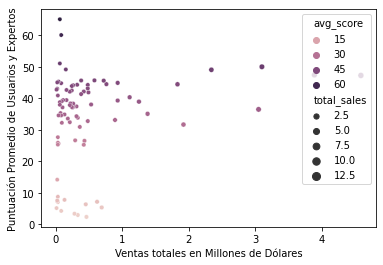

,avg_score,total_sales
avg_score,1.000000,0.228851
total_sales,0.228851,1.000000


In [27]:
# Se calcula el promedio de las calificaciones y se crea una nueva columna que contenga esta información. 
# Se elige 3Ds como caso de estudio.

relev_dat['avg_score'] = relev_dat[['user_score', 'critic_score']].mean(axis=1) 
df_3ds = relev_dat[relev_dat['platform'] == '3DS']
corr_df_3ds = df_3ds[['avg_score', 'total_sales']].corr()

sns.scatterplot(data=df_3ds, x='total_sales', y= 'avg_score', hue="avg_score", size= 'total_sales')

plt.xlabel('Ventas totales en Millones de Dólares')
plt.ylabel('Puntuación Promedio de Usuarios y Expertos')



plt.show()
display(corr_df_3ds)

La correlación no es fuerte para determinar que las críticas en promedo afectan la totalidad o popularidad en ventas de los videojuegos. La matriz de correlación muestra que es de 0.228. 

### Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,avg_score
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,52.60
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,52.55
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,NaN
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,52.65
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,37.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01,NaN
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01,43.80
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,NaN


'Consola PS3'

count    277.000000
mean       0.594621
std        1.590227
min        0.010000
25%        0.060000
50%        0.200000
75%        0.580000
max       21.050000
Name: total_sales, dtype: float64

'Consola X360'

count    180.000000
mean       0.747111
std        1.686678
min        0.010000
25%        0.080000
50%        0.270000
75%        0.817500
max       16.270000
Name: total_sales, dtype: float64

'Consola PS4'

count    316.000000
mean       0.884335
std        1.714402
min        0.010000
25%        0.077500
50%        0.265000
75%        0.865000
max       14.630000
Name: total_sales, dtype: float64

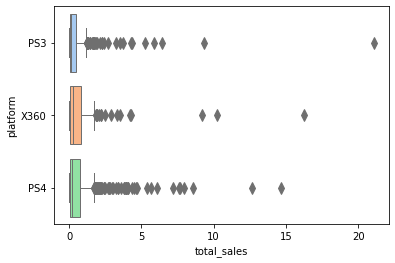

In [28]:
# Primero escogeremos los datos donde los registros de 'name' están duplicados, eso implica que dicho videojuego está en múltiples plataformas:

m_platform = relev_dat[relev_dat['name'].duplicated(keep=False)]

display(m_platform)

#Ahora usaremos los videojuegos registrados a las plataformas Top 3 en ventas y las almacenaremos en 3 variables distintas: 

top_1 = 'PS3'
top_2 = 'X360'
top_3 = 'PS4'

#Ahora procederemos a observar el comportamiento estadístico de las ventas por dichas plataformas:
df_top1 = m_platform[m_platform['platform'] == top_1]['total_sales']
df_top2 = m_platform[m_platform['platform'] == top_2]['total_sales']
df_top3 = m_platform[m_platform['platform'] == top_3]['total_sales']


display(f"Consola {top_1}", df_top1.describe())
display(f"Consola {top_2}", df_top2.describe())
display(f"Consola {top_3}", df_top3.describe())


#Finalmente graficaremos un diagrama de caja y bigote para ver su distribución de venta    
sns.boxplot(x = "total_sales", y = "platform", data = relev_dat, palette= 'pastel',  saturation = 0.9, linewidth = 1,
           fliersize = 8, order=[top_1, top_2, top_3])


plt.show()

Los datos arrojan comportamientos similares, en la mediana de la población en las desviaciones estándar.
Los gráficos arrojan comportamientos similares para los datos dentro de la distribución normal de la muestra.

Como conclusión, el comportamiento de las ventas de los 3 principales videojuegos en distintas plataformas, no muestra diferencias significativas.

### Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


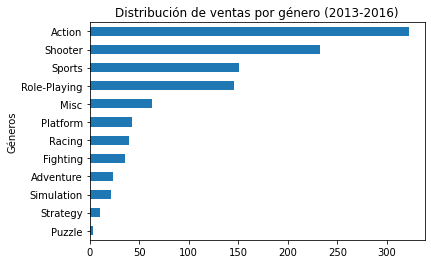

In [29]:
#Primero crearemos una agrupación de ventas totales por género:
genres = relev_dat.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

display(genres.reset_index())

#Ahora visualizaremos los datos:

genres.sort_values(ascending=True).plot(kind='barh', ylabel='Ventas en Millones de Dólares', xlabel='Géneros', title='Distribución de ventas por género (2013-2016)')

plt.show()

Se observa que los dos principales generos son "Action" y "Shooter", con ventas superiores a los 300 millones de dolares. los generos con menores ventas son "Simulation", "Strategy" y "Puzzle" sumando, entre los tres, 35.01 millones de dolares.

## Perfil de usuario para cada región

Paso 4. Crea un perfil de usuario para cada región

Para cada región (NA, UE, JP) determina:

    Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
    Los cinco géneros principales. Explica la diferencia.
    Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

### Las cinco plataformas principales

In [30]:
#Inicialmente guardaremos en Dataframes agrupados los top 5 de consolas con mejores ventas por región:

top_5_na = relev_dat.groupby('platform')['na_sales'].sum().sort_values(ascending = False)[:5].reset_index()
top_5_eu = relev_dat.groupby('platform')['eu_sales'].sum().sort_values(ascending = False)[:5].reset_index()
top_5_jp = relev_dat.groupby('platform')['jp_sales'].sum().sort_values(ascending = False)[:5].reset_index()

,platform,na_sales,eu_sales,jp_sales
0,PS4,108.74,141.09,15.96
1,XOne,93.12,51.59,NaN
2,X360,81.66,42.52,NaN
3,PS3,63.50,67.81,23.35
4,3DS,38.20,30.96,67.81
5,PSV,NaN,NaN,18.59
6,WiiU,NaN,NaN,10.88


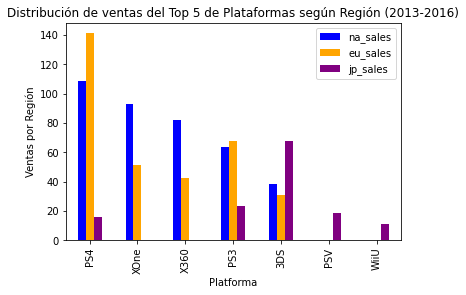

In [31]:
#Ahora procedemos a crear un nuevo DataFrame que almacene dicha información en 3 columnas distintas:

top_5_region_comp = top_5_na.merge(top_5_eu, how='outer', on='platform')

top_5_region_comp = top_5_region_comp.merge(top_5_jp, how='outer', on='platform')

display(top_5_region_comp)

#Finalmente visualizamos los datos para tener una mejor comprensión de la información
top_5_region_comp.plot(x= 'platform',
        y=['na_sales','eu_sales', 'jp_sales'],
        kind='bar',
        title= 'Distribución de ventas del Top 5 de Plataformas según Región (2013-2016)',
        xlabel= 'Platforma',
        ylabel= 'Ventas por Región',
        color= ['blue', 'orange', 'purple']
       )

plt.show()

Como podemos observar existen plataformas que fueron top 5 en unas regiones mientras que en otras no. Caso "PSV" y "WiiU" que solo obtuvieron buenas ventas en Japón, pero no en Europa ni en NorteAmérica.
Lo mismo se puede decir de "XOne" y "X360" que obtuvieron grandes volúmenes de ventas tanto en NorteAmérica como en Europa, sin embargo en Japón parecen no ser las plataformas preferidas para los compradores de videojuegos.

Las plataformas "PS4", y 'PS3' (de la compañia Sony) aparecen líderes en Europa, "PS4" y "XOne" lideran el mercado norteamericano y el mercado japones es liderado por la plataforma "3DS" de Nintendo.

En conclusión los patrones de ventas difieren según la región.

### Los cinco géneros principales.

In [32]:
#Al igual que lo hecho con las regiones, procederemos a almacenar en 3 distintos DataFrames los videojuegos agrupados por género para cada región:

top_5_na_genres = relev_dat.groupby('genre')['na_sales'].sum().sort_values(ascending = False)[:5].reset_index()

top_5_eu_genres = relev_dat.groupby('genre')['eu_sales'].sum().sort_values(ascending = False)[:5].reset_index()

top_5_jp_genres = relev_dat.groupby('genre')['jp_sales'].sum().sort_values(ascending = False)[:5].reset_index()

,genre,na_sales,eu_sales,jp_sales
0,Action,126.05,118.13,40.49
1,Shooter,109.74,87.86,6.61
2,Sports,65.27,60.52,NaN
3,Role-Playing,46.40,36.97,51.04
4,Misc,27.49,NaN,9.20
5,Racing,NaN,20.19,NaN
6,Fighting,NaN,NaN,7.65


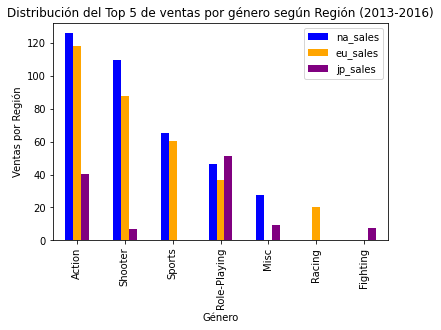

In [33]:
#Ahora crearemos una fusión entre DataFrames para obtener los resultados en un nuevo DataFrame que almacene las 3 columnas:

top_5_genres_comp = top_5_na_genres.merge(top_5_eu_genres, on= 'genre', how='outer')

top_5_genres_comp = top_5_genres_comp.merge(top_5_jp_genres, on= 'genre', how='outer')

display(top_5_genres_comp)

#Finalmente visualizamos los datos para tener una mejor comprensión de la información:

top_5_genres_comp.plot(x= 'genre',
        y=['na_sales','eu_sales', 'jp_sales'],
        kind='bar',
        title= 'Distribución del Top 5 de ventas por género según Región (2013-2016)',
        xlabel= 'Género',
        ylabel= 'Ventas por Región',
        color= ['blue', 'orange', 'purple']
       )
plt.show()

Se observa que en los mercados de Norte America y Europa, los juegos de acción son los mas populares, mientras que el mercado japones prefieres los Role-Playing.
Los juegos de Shooter (Número 3 en ventas globales) concentra su volumen de ventas principalmente en NorteAmérica y Europa.
Finalmente, se destaca las ventas por género en NorteAmérica coincide con las ventas por género en Europa para sus tres primeros puestos.
Al igual que las ventas según las plataformas, los géneros también varían según la región.

### Efecto de las clasificaciones de ESRB en las ventas en regiones individuales.

In [34]:
#Al igual que los dos ejercicios anteriores, agrupamos y almacenamos en DataFrames separados el Top 5 en ventas

ESRB_na_ratings = relev_dat.groupby('rating')['na_sales'].sum().sort_values(ascending = False).reset_index()

ESRB_eu_ratings = relev_dat.groupby('rating')['eu_sales'].sum().sort_values(ascending = False).reset_index()

ESRB_jp_ratings = relev_dat.groupby('rating')['jp_sales'].sum().sort_values(ascending = False).reset_index()

,rating,na_sales,eu_sales,jp_sales
0,M,165.21,145.32,14.11
1,E,79.05,83.36,15.14
2,E10+,54.24,42.69,5.89
3,T,49.79,41.95,20.59


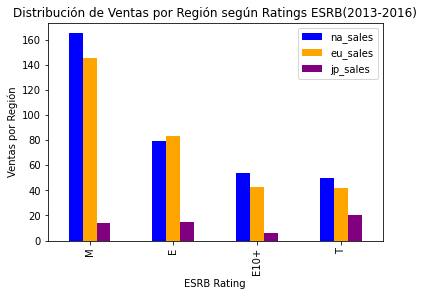

In [35]:
#Luego crearemos un nuevo DataFrame con la fusión de los ratings ESRB creados en el paso anterior:

ESRB_ratings_comp = ESRB_na_ratings.merge(ESRB_eu_ratings, how='outer', on='rating')

ESRB_ratings_comp = ESRB_ratings_comp.merge(ESRB_jp_ratings, how='outer', on='rating')

display(ESRB_ratings_comp)

#Finalmente visualizamos los datos para tener una mejor comprensión de la información:
ESRB_ratings_comp.plot(x= 'rating',
        y=['na_sales','eu_sales', 'jp_sales'],
        kind='bar',
        title= 'Distribución de Ventas por Región según Ratings ESRB(2013-2016)',
        xlabel= 'ESRB Rating',
        ylabel= 'Ventas por Región',
        color= ['blue', 'orange', 'purple']
       )

plt.show()


Por otro lado la categoría de rating 'M' (Mature 17+ años) es la que lidera las ventas en NorteAmérica y Europa, seguidas por 'E' (Everyone, apto para todo público). En japón la categoria 'T' (Adolescentes, Videojuegos con violencia moderada) lidera el rating, seguida por 'M' (Mature 17+ años).


## Prueba las siguientes hipótesis:

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [36]:
#Primero, tomaremos una muestra de los valores para cada plataforma que tengan registros NO Nulos de calificaciones de Usuario.

df_user_score = relev_dat[~relev_dat['user_score'].isnull()]

df_user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,avg_score
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,52.60
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,52.55
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,52.65
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,37.80
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36,36.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01,6.60
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81.0,8.5,E,0.01,44.75
16654,Ben 10 Omniverse 2,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,5.1,E10+,0.01,5.10
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,NaN,0.01,40.35


In [37]:
#En este caso la hipótesis nula debería considerar que: "Las calificaciones promedio de los usuarios para XOne y PC son iguales"

#Primero almacenaremos como DataFrames de muestra las calificaciones para XOne y PC:

sample_xone_user_score = df_user_score[df_user_score['platform'] == 'XOne']['user_score']

sample_pc_user_score = df_user_score[df_user_score['platform'] == 'PC']['user_score']

In [38]:
print(sample_xone_user_score.describe())
print()
print(sample_pc_user_score.describe())

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

count    155.000000
mean       6.269677
std        1.742381
min        1.400000
25%        5.300000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64


In [39]:
#Ahora definiremos como hipótesis nula lo siguiente: "Las varianzas de ambas muestran son iguales"

alpha = 0.05

levene_median = st.levene(sample_xone_user_score, sample_pc_user_score, center ='median') # ---> Prueba para determinar si las varianzas son iguales según la Mediana

levene_mean = st.levene(sample_xone_user_score, sample_pc_user_score, center ='mean')  # ---> Prueba para determinar si las varianzas son iguales según la Media


if (levene_median.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
    
if (levene_mean.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Rechazamos la hipótesis nula
Rechazamos la hipótesis nula


In [40]:
#Ahora procederemos con las consideraciones estadísticas para realizar la prueba de hipótesis:

alpha = 0.05 # Nuestro alpha será de 0.05

#Almacenaremos el cálculo de la prueba t en results, considerando que las varianzas son muy similares, por ello
#usamos equal_var = True (valor default en ttest_ind). El método a utilizar es st.ttest_ind:

results = st.ttest_ind(sample_xone_user_score, sample_pc_user_score) 

print('valor p:', results.pvalue) # Imprimimos el valor p obtenido
print()

if (results.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.14012658403611647

No podemos rechazar la hipótesis nula


Ya que los resultados obtenidos en las prevas de Levene y t-tes difieren, se acepta la hipótesis alternativa. Y se puede decir que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [41]:
#En este caso la hipótesis nula debería considerar que: "Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes."


#Primero almacenaremos como DataFrames de muestra las calificaciones para Action y Sports con base en el DataFrame de valores no nulos en user_score:

sample_action_user_score = df_user_score[df_user_score['genre'] == 'Action']['user_score']

sample_sports_user_score = df_user_score[df_user_score['genre'] == 'Sports']['user_score']

In [42]:
print(sample_action_user_score.describe())
print()
print(sample_sports_user_score.describe())

count    389.000000
mean       6.837532
std        1.330173
min        2.000000
25%        6.300000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

count    160.000000
mean       5.238125
std        1.783427
min        0.200000
25%        4.100000
50%        5.500000
75%        6.500000
max        8.800000
Name: user_score, dtype: float64


In [43]:
#Ahora definiremos como hipótesis nula lo siguiente: Las varianzas de ambas muestran son iguales

alpha = 0.05

levene_test_variance_median = st.levene(sample_action_user_score, sample_sports_user_score, center ='median') # ---> Prueba para determinar si las varianzas son iguales según la Mediana

levene_test_variance_mean = st.levene(sample_action_user_score, sample_sports_user_score, center ='mean')  # ---> Prueba para determinar si las varianzas son iguales según la Media


if (levene_test_variance_median.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
    
if (levene_test_variance_mean.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Rechazamos la hipótesis nula
Rechazamos la hipótesis nula


In [44]:
#Ahora procederemos con las consideraciones estadísticas para realizar la prueba de hipótesis:

alpha = 0.05 # Nuestro alpha será de 0.05

#Almacenaremos el cálculo de la prueba t en results, considerando que las varianzas son distintas según los resultados de la prueba leven, por ello
#usamos equal_var = False. El método a utilizar es st.ttest_ind:

results = st.ttest_ind(sample_action_user_score, sample_sports_user_score, equal_var = False) 

print('valor p:', results.pvalue) # Imprimimos el valor p obtenido
print()

if (results.pvalue < alpha): 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 1.4460039700704315e-20

Rechazamos la hipótesis nula


Se rechaza la hipótesis nula debido a que el valor p obtenido es menor al valor alpha establecido, por lo tanto se puede decir que el la probabilidad que los promedios de calificaciones entre Action y Sports sean iguales es muy baja.

## Comentarios sobre los métodos de prueba de hipótesis usados:

- En ambos casos se usó la prueba de Hipótesis sobre la igualdad de las medias de dos poblaciones, para probar la hipótesis de que las medias de dos poblaciones estadísticas son iguales según las muestras tomadas de ellas, aplica la función scipy.stats.ttest_ind(array1, array2, equal_var).

- Previamente a la prueba desarrollada, se establece la [Prueba Levene] para determinar si ambas poblaciones tienen varianzas iguales.

- Las hipótesis nulas y alternativas fueron formuladas de la siguiente forma: H0 = Los promedios de ambas muestras poblacionales son iguales. H1 = Los promedios de ambas muestras poblacionales son distintas.

## Conclusión general


- Las principales plataformas en total de ventas surgieron entre 1994 y 2016, se considera reelevante el periodo posterior a 2013 ya que es donde muestran un comportamiento mas estable.

- Las mayores ventas en diversidad de plataformas se dió entre los años 2005 a 2016 que es cuando empezaron las nuevas generaciones de consolas a establecerse en el mercado, marcando así la consolidación de las 3 grandes empresas de vieojuegos: Sony (Creadora del PS, PS2, PS3 y PS4), Nintendo (Creadora del Nintendo DS, Wii, Gameboy Advance y en la década de los 80's y 90's con el NES, el SNES y el N64) y finalmente Microsoft (Creadora del XBox, X360 y XOne).

- El top 3 de ventas lo lideran PS4, X360 y PS3, que aparecieron entre los años 2000 y 2013; plataformas que lideraron las ventas de videojuegos en las regiones de Norte America y Europa.

- Por otro lado, las plataformas 'PS4', y 'PS3' (que pertenecen a la compañia Sony) aparecen líderes en todas las regiones, haciendo ver entonces que Sony hizo muy buen trabajo en sus consolas a lo largo de dichas regiones.
Existen plataformas que fueron top 5 en unas regiones mientras que en otras no. Caso '3DS' que solo obtuvo buenas ventas en Japón, pero no en Europa ni en NorteAmérica. Lo mismo se puede decir de 'X360' que obtuvo grandes volúmenes de ventas tanto en NorteAmérica como en Europa, sin embargo en Japón parece no ser ten popular entre los compradores de videojuegos. 

    En conclusión podemos decir entonces que los patrones de ventas difieren según la región.

- El comportamiento de compra de los usuarios en Japón tiene tendencias muy particulares respecto a los de las regiones de NorteAmérica y Europa. Mientras que en NorteAmérica y Europa el género de Role-Playing no es populare, para Japón sí, tanto así que Role-Playing es el género que más ventas obtuvo en Japón. Por otro lado, los géneros que son populares en las regiónes de Norte America y Europa son los de Acción, y Shooter. Finalmente, se destaca que el Top 4 de ventas por género en NorteAmérica coincide con el Top 4 de ventas por género en Europa.

    Al igual que las ventas según las plataformas, los géneros también varían según la región.

- Tal y como se estableció en el análisis de influencia de los ratings ESRB:  **El Rating en sí afecta las ventas mas no hay variedades en su comportamiento de compra según la región.**

- La tendencia de ventas por consola de los videojuegos en promedio muestra que los juegos no alcanzan el millón de dólares en ventas. Sin embargo hay muchos juegos, en cada plataforma, que sobresalen por encima del grupo normal distribuido de ventas. Dichos juegos son conocidos como videojuegos de culto, Best-Sellers que marcaron la industria de la plataforma donde hicieron su aparición: 136 datos atípicos que superaron la mayor distancia de Max_distance_IQR = 1.91; entre los que se encuentran títulos como Pokemon, Call of Duty, Mario Kart Wii, Minecraft, FIFA, Super Mario 64, entre otros, que marcaron una generación de consolas como "Los más grandes títulos en la historia de los videojuegos".

- **Respecto a las pruebas de hipótesis:**
    - En el primer caso no se rechaza la hipótesis nula, debido a que el valor p es mayor al alpha de prueba establecido de 0.05. Lo cual quiere decir la probabilidad que los promedios de calificaciones entre XOne y PC sean iguales es alta.
    - Mientras que en el segundo caso se rechaza la hipótesis nula, debido a que el valor p es menor al alpha de prueba establecido de 0.05. Lo cual quiere decir la probabilidad que los promedios de calificaciones entre Action y Sports sean iguales es baja.